In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
from pyproj import CRS

# Reading and loading data
birds_df = pd.read_csv("/home/jake_ockerby/Python/bird_migration/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448
5,2014-12-15 15:00:00,-61.648530,-11.372407,30448
6,2014-12-30 19:59:00,-61.825113,-10.459245,30448
7,2015-01-15 00:59:00,-58.779585,-3.874240,30448
8,2015-01-30 05:59:00,-59.214892,-3.327592,30448
9,2015-02-14 10:59:00,-59.500591,-3.918050,30448


In [2]:
# Loading the GeoDataFrame and Coordinate Reference System
birds =  gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))
birds.crs = CRS('epsg:4326')

# Loading country borders into GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."


In [3]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = CRS('epsg:4326')

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = CRS('epsg:4326')

start_gdf

,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)
5,30300,POINT (-94.75309 45.86958)
6,30304,POINT (-92.91447 29.84413)
7,30380,POINT (-82.72467 28.87130)
8,30384,POINT (-87.46776 19.69883)
9,30445,POINT (-96.82039 20.29754)


In [4]:
# GeoDataFrame showing ending point for each bird
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = CRS('epsg:4326')

end_gdf

,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)
5,30300,POINT (-50.22547 -9.84450)
6,30304,POINT (-52.55503 -5.85648)
7,30380,POINT (-63.98744 -2.93250)
8,30384,POINT (-51.85126 -2.90570)
9,30445,POINT (-53.97454 -2.35599)


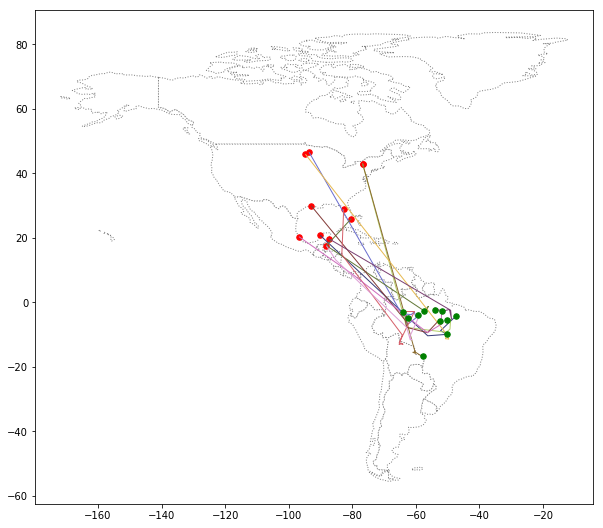

In [6]:
# Ploting the bird migration flight paths
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='green', markersize=30)

# The map shows that of the purple martins studied, they all migrate to Brazil
# with most arriving in the amazon rainforest